In [1]:
pip install denmanlab
# pip install open_ephys

SyntaxError: invalid syntax (2293000065.py, line 1)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import os,sys,glob, json
import _pickle as pkl
import dlab
from tqdm.notebook import tqdm
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.style.use('dark_background')

In [4]:
import matplotlib 
matplotlib.rcParams.update({'figure.max_open_warning': 0})

change experiment metadata to match yours here:

In [5]:
recording_folder = r'G:/Grant/rotation/2023-09-20_14-25-05_eOPN3_33/'

experimenter = 'grh'
experiment_description= 'Denman Lab, University of Colorado Anschutz. Test of eOPN3 V1 axon silencing in LM'

#spikeglx
# probes = [os.path.basename(f) for f in np.sort(glob.glob(recording_folder+'/*-AP*'))]

probeids = ['A','B','C'] 
probedepths = [1050,1100,3300] 

In [6]:
probes

NameError: name 'probes' is not defined

## stimulus time parsing
load timestamps from the sync channels of the recording

In [7]:
from open_ephys.analysis import Session

directory = recording_folder # for example

session = Session(directory)

In [8]:
events_df = pd.DataFrame(session.recordnodes[0].recordings[0].events)#

In [9]:
ni_df = events_df[events_df.stream_name == 'PXI-6133' ]

In [10]:
ni_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
4,8,26918761,896.901100,107,6,PXI-6133,1
11,8,26933776,897.401600,107,6,PXI-6133,0
15,8,26948791,897.902100,107,6,PXI-6133,1
21,8,26963806,898.402600,107,6,PXI-6133,0
32,8,26978821,898.903100,107,6,PXI-6133,1
...,...,...,...,...,...,...,...
1247691,8,340794013,11359.410240,107,6,PXI-6133,1
1247697,8,340809029,11359.910033,107,6,PXI-6133,0
1247702,8,340824044,11360.410533,107,6,PXI-6133,1
1247712,8,340839059,11360.911773,107,6,PXI-6133,0


In [11]:
# Filter rows where 'line' equals 4
arbMatrix_df = ni_df[ni_df['line'] == 4]
arbMatrix_df

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
8303,4,44718198,1490.215667,107,6,PXI-6133,1
8306,4,44718200,1490.215733,107,6,PXI-6133,0
12936,4,53952624,1798.029867,107,6,PXI-6133,1
12943,4,53954078,1798.078333,107,6,PXI-6133,0
12944,4,53954124,1798.079867,107,6,PXI-6133,1
...,...,...,...,...,...,...,...
1158073,4,312255200,10408.115733,107,6,PXI-6133,1
1158074,4,312255201,10408.115767,107,6,PXI-6133,0
1227165,4,327510091,10916.612100,107,6,PXI-6133,1
1227166,4,327510092,10916.612133,107,6,PXI-6133,0


In [12]:
ni_ts = {}
df_up = ni_df[ni_df.state==1]
for ch in ni_df.line.unique():
    ni_ts[ch] = df_up[df_up.line == ch].timestamp

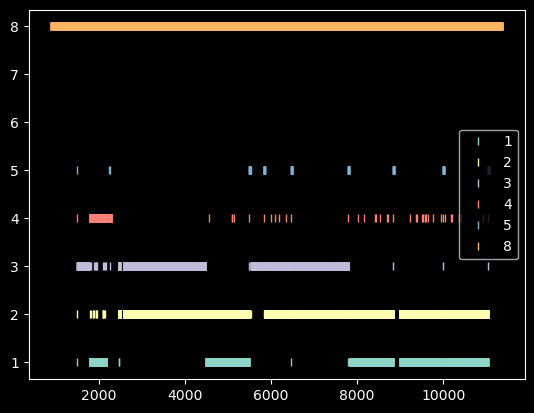

In [13]:
for ch in ([1,2,3,4,5,8]):
    plt.plot(np.array(ni_ts[ch]),
             np.ones(len(ni_ts[ch]))*ch,
             '|',label=ch)
plt.legend()

this cell likely change for each stimulus script, but should be the roughly same for different experiments with the same stimulus script. This one is for the `V1_LM.py`` stimulus script

In [108]:
# eye_camera_frame_times = ni_ts[7]
 
# Optogenetic light pulse ---good---
opto_df = ni_df[ni_df.line==5]
opto_off_times = opto_df[opto_df.state==0].timestamp 
opto_on_times = opto_df[opto_df.state==1].timestamp

# danFlashCSD.py, ---good---
df_flash = ni_df[ni_df.line==3] 
flash_times = df_flash[df_flash.state==1].timestamp[:100] #first 100 are flash onset
inhibitory_flash_times = df_flash[df_flash.state==1].timestamp[:100] #first 100 are flash onset


# arbMatrix_highspeed.py lines 2,3
df_strf = ni_df[ni_df.line==4]
arbMatrix_times = df_strf[df_strf.state==1].timestamp[:-1] 
inhibitory_arbMatrix_times = df_strf[df_strf.state==1].timestamp[:-1]

# grant_grantings_ori.py, lines 2,3
df_gratings = ni_df[ni_df.line==2]
df_gratings = df_gratings.reset_index(drop=True)
gratings_times = df_gratings[df_gratings.state==1].timestamp[12716:13516]
inhibitory_gratings_times = df_gratings[df_gratings.state==1].timestamp[12000:12800]

# grant_screen_flicker.py, lines 2,3
df_flicker = ni_df[ni_df.line==2]
flicker_times = df_flicker[df_flicker.state==1].timestamp[1:241]
inhibitory_flicker_times_1 = df_flicker[df_flicker.state==1].timestamp[1:241]
inhibitory_flicker_time_2 = df_flicker[df_flicker.state==1].timestamp[1:241]




In [109]:
print(flash_times)
print(len(flash_times))


8316     1490.625167
8360     1493.623300
8404     1496.625767
8448     1499.628764
8492     1502.631900
            ...     
12496    1775.890000
12540    1778.893033
12584    1781.896767
12628    1784.899300
12672    1787.902100
Name: timestamp, Length: 100, dtype: float64
100


In [116]:
filtered_df = df_gratings[df_gratings["state"] == 1]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df[175:180]

,line,sample_number,timestamp,processor_id,stream_index,stream_name,state
175,2,74716592,2490.162295,107,6,PXI-6133,1
176,2,74718089,2490.212195,107,6,PXI-6133,1
177,2,74719589,2490.262195,107,6,PXI-6133,1
178,2,74721099,2490.312529,107,6,PXI-6133,1
179,2,77559783,2584.934998,107,6,PXI-6133,1


In [114]:
# Assuming df is your DataFrame
differences = filtered_df['timestamp'].diff()  # This computes the difference between successive timestamps

indexes = differences[differences > 25].index
print(indexes)

Int64Index([1, 3, 5, 8, 12, 14, 179, 72940, 72941, 72942, 84943, 85584, 145705,
            205826],
           dtype='int64')


make sure to check all of the `_times` in the above cell to make sure they have the correct number of times with the correct approximate spacing between each (for example, between each trial for gratings or between in each frame for arbMatrix)

In [16]:
opto_on_times[:60]

8304      1490.215667
125555    2242.410121
126027    2273.195900
546804    5492.796458
546834    5494.798233
546864    5496.815100
546894    5498.833125
546924    5500.838867
546954    5502.853067
546984    5504.871125
547014    5506.888633
547044    5508.902200
547074    5510.917433
547104    5512.935733
547134    5514.944508
547164    5516.952067
547194    5518.972500
547224    5521.004741
547312    5526.941874
551734    5827.999067
551764    5830.017400
551794    5832.038846
551824    5834.069933
551854    5836.073833
551884    5838.110113
551914    5840.112233
551944    5842.148467
551974    5844.158947
552004    5846.168167
552034    5848.185633
552064    5850.202533
552094    5852.222067
552124    5854.240100
552154    5856.262667
656959    6467.279333
656989    6469.296433
657019    6471.298467
657049    6473.315679
657079    6475.337167
657109    6477.354500
657139    6479.374011
657169    6481.393133
657199    6483.407567
657229    6485.412678
657259    6487.430767
657289    

In [17]:
flash_times

8316     1490.625167
8360     1493.623300
8404     1496.625767
8448     1499.628764
8492     1502.631900
            ...     
12496    1775.890000
12540    1778.893033
12584    1781.896767
12628    1784.899300
12672    1787.902100
Name: timestamp, Length: 100, dtype: float64

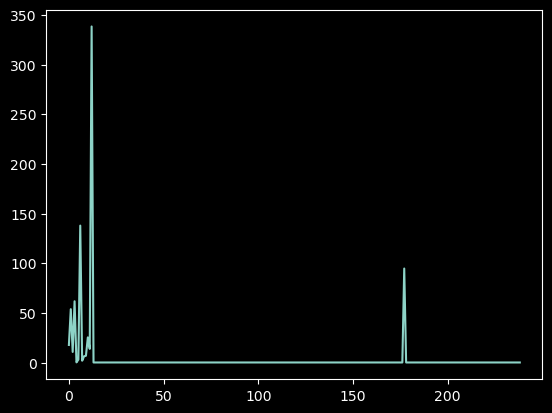

In [18]:
plt.plot(np.diff(gratings_times))

In [19]:
stimuli_times = {'luminance_flash':flash_times,
                 'gratings':gratings_times,
                 'spatioluminance_noise':arbMatrix_times,
                  }

In [13]:
gratings_pkl = pkl.load(open(glob.glob(stim_path+'/*gratings_o*')[0],'rb'))
# gratings_color_pkl = pkl.load(open(glob.glob(stim_path+'/*gratings_c*')[0],'rb'))

# arbMatrixcolor_pkl = pkl.load(open(glob.glob(stim_path+'/*color_*')[0],'rb'))
# arbMatrix_pkl = pkl.load(open(glob.glob(stim_path+'/*highspeed*')[0],'rb'))
arbMatrix_matrix = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[0],'rb'))
# arbMatrix_pkl2 = pkl.load(open(glob.glob(stim_path+'/*highspeed*')[1],'rb'))
# arbMatrix_matrix1 = pkl.load(open(np.sort(glob.glob(stim_path+'/*'))[1],'rb'))
# sweeps = json.load(open(glob.glob(stim_path+'/*.json')[0],'rb'))
#stimulus list
stimuli = {'luminance_flash':None,
           'gratings':gratings_pkl,
            'spatioluminance_noise':arbMatrix_matrix,
           } 

## Assemble NWB

In [14]:
import pynwb
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.utils import StrDataset

In [106]:
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile

nwbfile = NWBFile('Axon silencing with eArch3.0; ax11', 
                  recording_folder, 
                  datetime.now(tzlocal()),
                  experimenter=experimenter,
                  lab='Denman Lab',
                  institution='University of Colorado',
                  experiment_description=experiment_description,
                  session_id=os.path.basename(recording_folder))

add stimulus information

In [108]:
for stim in stimuli_times.keys():
    nwbfile.add_epoch(np.array(stimuli_times[stim])[0], 
                      np.array(stimuli_times[stim])[-1]+3.,
                      [stim])

In [107]:
nwbfile.add_trial_column('stimulus', 'the stimulus during this trial')

#optogenetics
nwbfile.add_trial_column('optogenetics_LED_state',    'whether or not the LED was on or off for this trial. 1=on,0=off. exact opto times are available in ____ field of NWB')

#flashCSD
nwbfile.add_trial_column('flash_luminance', 'the luminance of the flash on this trial. 1=bright,0=dark')

#gratings_orientation
nwbfile.add_trial_column('contrast', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('temporal_frequency', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('spatial_frequency', 'index of each trial into a matrix of images')
nwbfile.add_trial_column('orientation', 'index of each trial into a matrix of images')

#arbMatrix
nwbfile.add_trial_column('stimulus_index', 'index of each trial into a matrix of images')

stim_vals = {'optogenetics_LED_state':-1,
             'flash_luminance':-1,
             'contrast':-1,
             'temporal_frequency':-1,
             'spatial_frequency':-1,
             'orientation':-1,
             'stimulus_index':-1,}

lums = [0,1]#['white','black']
stim = 'luminance_flash'
for i,trial_start in enumerate(np.array(stimuli_times[stim])):
    if np.min(np.abs(opto_on_times - trial_start)) < 0.4: opto_state=1
    else: opto_state=0
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,
                      flash_luminance=lums[i%2],
                      optogenetics_LED_state=opto_state,
                      contrast = stim_vals['contrast'],
                     temporal_frequency = stim_vals['temporal_frequency'],
                     spatial_frequency = stim_vals['spatial_frequency'],
                     orientation = stim_vals['orientation'],
                      stimulus_index = stim_vals['stimulus_index'],
                     )

stim = 'gratings'
info = [stimuli[stim]['bgsweeptable'][ind] for ind in stimuli[stim]['bgsweeporder']]
for i,trial_start in enumerate(stimuli_times[stim]):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,
                        flash_luminance = stim_vals['flash_luminance'],
                      stimulus_index = stim_vals['stimulus_index'],
                      contrast=info[i][0],
                     temporal_frequency=info[i][2],
                     spatial_frequency=info[i][3],
                     orientation=info[i][-2],
                     optogenetics_LED_state=info[i][-1])

stim = 'spatioluminance_noise'
for i,trial_start in enumerate(stimuli_times[stim]):
    nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])),stimulus=stim,
                      flash_luminance = stim_vals['flash_luminance'],
                      stimulus_index=i,
                      contrast = stim_vals['contrast'],
                     temporal_frequency = stim_vals['temporal_frequency'],
                     spatial_frequency = stim_vals['spatial_frequency'],
                     orientation = stim_vals['orientation'],
                      optogenetics_LED_state = stim_vals['optogenetics_LED_state'])
    
 # stim = 'gratings_color'
# info = [stimuli[stim]['bgsweeptable'][ind] for ind in stimuli[stim]['bgsweeporder']]
# for i,trial_start in enumerate(stimuli_times[stim]):
#     nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,stimulus_info=[info[i]])

# stim = 'sweeping_bar'
# for i,trial_start in enumerate(stimuli_times[stim]):
#     nwbfile.add_trial(start_time=trial_start, stop_time=trial_start+np.mean(np.diff(stimuli_times[stim])), stimulus=stim,stimulus_info=[list(stimuli[stim]['ori'].values())[i]])


In [98]:
nwbfile.trials.to_dataframe()

,start_time,stop_time,stimulus,optogenetics_LED_state,flash_luminance,contrast,temporal_frequency,spatial_frequency,orientation,stimulus_index
id,,,,,,,,,,
0,8772.532871,8775.535713,luminance_flash,0,0,-1,-1,-1.0,-1,-1
1,8775.546567,8778.549409,luminance_flash,0,1,-1,-1,-1.0,-1,-1
2,8778.538233,8781.541075,luminance_flash,0,0,-1,-1,-1.0,-1,-1
3,8781.540867,8784.543709,luminance_flash,1,1,-1,-1,-1.0,-1,-1
4,8784.543867,8787.546709,luminance_flash,0,0,-1,-1,-1.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...
14665,8614.984667,8615.034714,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14395
14666,8615.034767,8615.084814,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14396
14667,8615.084833,8615.134880,spatioluminance_noise,-1,-1,-1,-1,-1.0,-1,14397


## add optogenetics

In [109]:
np.array(opto_off_times).shape[0]

161

In [110]:
opto_states = pynwb.epoch.TimeIntervals(
    name="optogenetics_states",
    description="intervals for optical fiber, fiber at power = 1.5AU on cyclops driver. fiber 565nm, ",
)
opto_states.add_column(name="power", description="power of fiber")
opto_states.add_column(name="wavelength", description="wavelength of light")

for i in range(np.array(opto_off_times).shape[0]):
    opto_states.add_row(start_time=np.array(opto_on_times)[i], stop_time=np.array(opto_off_times)[i], power=1.5, wavelength=565)

nwbfile.add_time_intervals(opto_states)

optogenetics_states pynwb.epoch.TimeIntervals at 0x140181767651088
Fields:
  colnames: ['start_time' 'stop_time' 'power' 'wavelength']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    power <class 'hdmf.common.table.VectorData'>,
    wavelength <class 'hdmf.common.table.VectorData'>
  )
  description: intervals for optical fiber, fiber at power = 1.5AU on cyclops driver. fiber 565nm, 
  id: id <class 'hdmf.common.table.ElementIdentifiers'>

### add ephys data
first add electrodes and raw data link

In [111]:
from dlab.nwbtools import df_from_phy, load_phy_template, option234_positions, multi_load_unit_data


In [112]:
df_units = multi_load_unit_data(recording_folder,probe_depths=probedepths)

/Users/danieldenman/opt/anaconda3/lib/python3.9/site-packages/dlab/nwbtools.py:487: RuntimeWarning: invalid value encountered in true_divide
  weights = weights/np.max(weights)


In [113]:
locations = ['VISp','VISl','VISa;CA1;DG;LP']
descriptions = ['Neuropixels1.0','NeuropixelsUltraAlpha','Neuropixels1.0'] 

In [114]:
device = nwbfile.create_device(name='DenmanLab_EphysRig1')

for i, probe in enumerate(probes):
    electrode_name = 'probe'+str(i)
    description = descriptions[i]
    location = locations[i]

    electrode_group = nwbfile.create_electrode_group(electrode_name,
                                                     description=description,
                                                     location=location,
                                                     device=device)
    for ch in range(option234_positions.shape[0]):
        nwbfile.add_electrode(x=option234_positions[ch,0],y=0.,z=option234_positions[0,1],imp=0.0,location='none',filtering='high pass 300Hz',group=electrode_group)
    
#     if len(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')) > 0:
#         ephys_ts = pynwb.ecephys.ElectricalSeries('lfp_probe'+probeids[i],
#                                 data=H5DataIO(data=StrDataset(glob.glob(os.path.join(recording_folder,probes[1])+'/*lf.b*')[0]),    
#                                         link_data=True),
#                                 electrodes = electrode_group,
#                                 starting_time=0,
#                                 rate=2500,
#                                 resolution=0.001,
#                                 comments="V1, depth = 1500um",
#                                 description="V1, depth = 1500um")
#         nwbfile.add_acquisition(ephys_ts)

In [115]:
# nwbfile.add_unit_column('location', 'the anatomical location of this unit')
# nwbfile.add_unit_column('quality', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_ISIviolations', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_sn', 'the quality for the inference of this unit')
# nwbfile.add_unit_column('quality_distance', 'the quality for the inference of this unit')

nwbfile.add_unit_column('depth', 'the depth of this unit from the pia')
nwbfile.add_unit_column('xpos', 'the x position on probe')
nwbfile.add_unit_column('ypos', 'the y position on probe')
# nwbfile.add_unit_column('template', 'Kilosort template')
nwbfile.add_unit_column('label', 'user label')
nwbfile.add_unit_column('KSlabel', 'Kilosort label')
nwbfile.add_unit_column('KSamplitude', 'Kilosort amplitude')
nwbfile.add_unit_column('KScontamination', 'Kilosort ISI contamination')
nwbfile.add_unit_column('probe', 'probe ID')

labels =np.array(['noise','mua','good'])

for i,unit_row in df_units.iterrows():
    try: lbl = np.argwhere(unit_row.group==labels)[0][0]
    except: lbl=0
    try: klbl = np.argwhere(unit_row.KSlabel==labels)[0][0]
    except: klbl=0
    nwbfile.add_unit(id=int(unit_row.name), 
                     spike_times=unit_row.times,
                     electrodes = np.where(unit_row.waveform_weights > 0)[0],
                     waveform_mean = unit_row.template,
# #                       quality=0.95
                     depth = unit_row.depth,
                     xpos= unit_row.xpos,
                     ypos= unit_row.zpos,
#                      # template= unit_row.template,
                     label= lbl,
                     KSlabel= klbl,
                     KSamplitude= unit_row.KSamplitude,
                     KScontamination= unit_row.KScontamination,
                     probe= unit_row.probe,
                    )

In [116]:
nwb_path = os.path.join(recording_folder,recording_folder.split('/')[-5])+'.nwb'
with pynwb.NWBHDF5IO(nwb_path, 'w') as io:
    io.write(nwbfile)

# Load data

In [9]:
nwb_path = '/Volumes/DATA7/20230119_ax9_g0/20230119_ax9_g0.nwb'

In [5]:
nwb = h5py.File(nwb_path,'r')

In [6]:
nwb

<HDF5 file "20230119_ax9_g02.nwb" (mode r)>

# browse with NWBwidget

In [7]:
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [10]:
io = NWBHDF5IO(nwb_path, mode='r')
nwb_ = io.read()

nwb2widget(nwb_)

In [32]:
df_stim = nwb_.trials.to_dataframe()
df_opto = nwb_.get_time_intervals('optogenetics_states').to_dataframe()
df_units = nwb_.units.to_dataframe()

In [38]:
optogenetics_LED_state = []
for i,row in df_stim.iterrows():
    if np.min(np.abs(df_opto.start_time.values - row.start_time))<0.1:
        optogenetics_LED_state.extend([1])
    else:
        optogenetics_LED_state.extend([0])
df_stim['optogenetics_LED_state']= optogenetics_LED_state

## flash responses

In [19]:
import dlab.psth_and_raster as psth
from dlab.generalephys import cleanAxes
df1=df_units

plot one unit

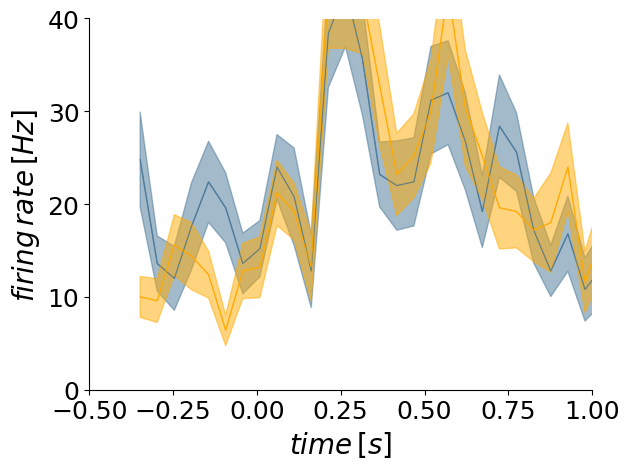

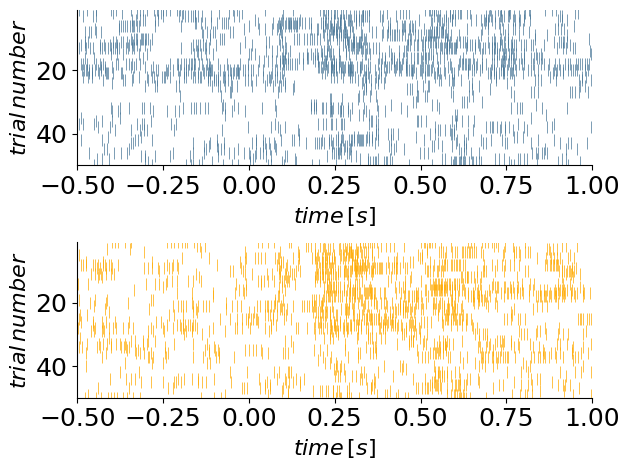

In [51]:
unit=103
df1 = df_units[df_units.probe=='B']
f,ax=plt.subplots(1,1)
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              ymax=40,binsize=0.05,axes=ax,color='#487697')
psth.psth_line(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 1)].start_time.values,
              ymax=40,binsize=0.05,axes=ax,color='#ffaa00')
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.eps')
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_psth.png')

f,ax=plt.subplots(2,1)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 0)].start_time.values,
              axes=ax[0],color='#487697',timeDomain=True,post=1.5,ms=8)
psth.raster(times=df1[df1.index==unit].spike_times.values[0],
         triggers=df_stim[(df_stim.stimulus=='luminance_flash') & (df_stim.optogenetics_LED_state == 1)].start_time.values,
              axes=ax[1],color='#ffaa00',timeDomain=True,post=1.5,ms=8)
for ax_ in ax: ax_.set_xlim(-0.5,1.0)
plt.tight_layout()
# f.savefig('/Users/danieljdenman/Academics/grants/applications/20230305_R01_NEI_resub/figures/eArch_LM_raster.eps')